## Movie 3: Functional roles of NHE1 and/or SWELL1 in cell dissemination from 3D breast cancer spheroids embedded in 3D collagen gels 

In [2]:
%matplotlib inline
from skimage import io
from skimage.filters import threshold_otsu
from skimage.filters.rank import entropy
from skimage.morphology import disk
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os

movie3_path = "movies/movie3.avi"

In [3]:
# This cell was used to store each frame from the video to be used for calibrating and testing parameters
#movie_path = "movies/movie3.avi"
#output_path = "movies/movie3"
#movie = cv2.VideoCapture(movie_path)
#count = 0
#while movie.isOpened():
#    count += 1
#    success, frame = movie.read()
#    if not success:
#        break
#    cv2.imwrite(f'{output_path}/frame{count}.jpg', frame)

#movie.release()
#cv2.destroyAllWindows()


##### Find right parameters

SC Entropy: 0.14753473173693962
Dual KD Entropy: 0.13651668645871376
Inverted (480, 1280) Entropy (480, 1280)


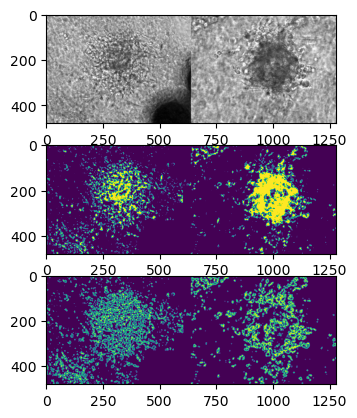

In [8]:
fig, (ax0, ax1, ax2) = plt.subplots(3, sharex=False, sharey=False)

img_raw = cv2.imread("movies/movie3/frame53.jpg")

sc_frame = img_raw[80:, :1250]
sc_frame = cv2.cvtColor(sc_frame, cv2.COLOR_BGR2RGB)
sc_frame_gray = cv2.cvtColor(sc_frame, cv2.COLOR_BGR2GRAY)
sc_frame_gray_inverted = cv2.bitwise_not(sc_frame_gray)

dual_kd_frame = img_raw[200:800, 1550:2300]
dual_kd_frame = cv2.cvtColor(dual_kd_frame, cv2.COLOR_BGR2RGB)
dual_kd_frame_gray = cv2.cvtColor(dual_kd_frame, cv2.COLOR_BGR2GRAY)
dual_kd_frame_gray_inverted = cv2.bitwise_not(dual_kd_frame_gray)

dual_kd_black_spot1 = dual_kd_frame_gray_inverted[0:200, 620:]

sc_black_spot1 = sc_frame_gray_inverted[650:, 850:]
sc_black_spot2 = sc_frame_gray_inverted[350:650, 1180:]
sc_black_spot3 = sc_frame_gray_inverted[750:, 800:850]
sc_black_spot4 = sc_frame_gray_inverted[500:650, 1100:1180]

sc_black_spot1_replacement = np.ones((sc_black_spot1.shape), np.uint8)
sc_black_spot2_replacement = np.ones((sc_black_spot2.shape), np.uint8)
sc_black_spot3_replacement = np.ones((sc_black_spot3.shape), np.uint8)
sc_black_spot4_replacement = np.ones((sc_black_spot4.shape), np.uint8)

dual_kd_black_spot1_replacement = np.ones((dual_kd_black_spot1.shape), np.uint8)

sc_frame_gray_inverted[650:, 850:] = sc_black_spot1_replacement
sc_frame_gray_inverted[350:650, 1180:] = sc_black_spot2_replacement
sc_frame_gray_inverted[750:, 800:850] = sc_black_spot3_replacement
sc_frame_gray_inverted[500:650, 1100:1180] = sc_black_spot4_replacement

dual_kd_frame_gray_inverted[0:200, 620:] = dual_kd_black_spot1_replacement

_, sc_thresh = cv2.threshold(sc_frame_gray_inverted, 140, 255, cv2.THRESH_BINARY)
_, dual_kd_thresh = cv2.threshold(dual_kd_frame_gray_inverted, 140, 255, cv2.THRESH_BINARY)

sc_entropy_frame = entropy(sc_thresh, disk(3))
dual_kd_entropy_frame = entropy(dual_kd_thresh, disk(3))

#print({"sc_entropy_frame": sc_entropy_frame})
width = 640
height = 480
frame_size = (width, height)

sc_inverted = cv2.resize(sc_thresh, frame_size)
dual_kd_inverted = cv2.resize(dual_kd_thresh, frame_size)

sc = cv2.resize(sc_entropy_frame, frame_size)
dual_kd = cv2.resize(dual_kd_entropy_frame, frame_size)

sc_dual_kd_raw = np.hstack((cv2.resize(sc_frame, frame_size), cv2.resize(dual_kd_frame, frame_size)))
sc_dual_kd_stack_inverted = np.hstack((sc_inverted, dual_kd_inverted))
sc_dual_kd_stack = np.hstack((sc, dual_kd))

combined_stack = np.vstack((sc_dual_kd_stack_inverted, sc_dual_kd_stack))

ax0.imshow(sc_dual_kd_raw)
ax1.imshow(sc_dual_kd_stack_inverted)
ax2.imshow(sc_dual_kd_stack)
print("SC Entropy:", cv2.mean(sc_entropy_frame)[0])
print("Dual KD Entropy:", cv2.mean(dual_kd_entropy_frame)[0])
print("Inverted", sc_dual_kd_stack_inverted.shape, "Entropy", sc_dual_kd_stack.shape)

## Mean pixels of entropy frames as measure of cell migration rate
- The mean pixel values obtained with 'cv2.mean()' are used as entropy values
- Each value in each frame is appended to the 'entropies' list which will be converted to a Pandas dataframe for analysis
- The time interval between each frame is 20 minutes.

In [11]:
print("Press 'q' to end video")
cap = cv2.VideoCapture(movie3_path)


# Get movie frame size
width = 480
height = 360
frame_size = (width,height)

output_frames = "movies/out3"

frame_index = 0 # Track frame number for fluorescent intensity table

entropies = []

while True:
    frame_index += 1
    success, frame = cap.read()

    if success and frame.size != 0:
        # Isolate regions of interest
        sc_frame = frame[80:, :1250]
        sc_frame = cv2.cvtColor(sc_frame, cv2.COLOR_BGR2RGB)
        sc_frame_gray = cv2.cvtColor(sc_frame, cv2.COLOR_BGR2GRAY)
        sc_frame_gray_inverted = cv2.bitwise_not(sc_frame_gray)

        dual_kd_frame = frame[200:800, 1550:2300]
        dual_kd_frame = cv2.cvtColor(dual_kd_frame, cv2.COLOR_BGR2RGB)
        dual_kd_frame_gray = cv2.cvtColor(dual_kd_frame, cv2.COLOR_BGR2GRAY)
        dual_kd_frame_gray_inverted = cv2.bitwise_not(dual_kd_frame_gray)

        dual_kd_black_spot1 = dual_kd_frame_gray_inverted[0:200, 620:]

        sc_black_spot1 = sc_frame_gray_inverted[650:, 850:]
        sc_black_spot2 = sc_frame_gray_inverted[350:650, 1180:]
        sc_black_spot3 = sc_frame_gray_inverted[750:, 800:850]
        sc_black_spot4 = sc_frame_gray_inverted[500:650, 1100:1180]

        sc_black_spot1_replacement = np.ones((sc_black_spot1.shape), np.uint8)
        sc_black_spot2_replacement = np.ones((sc_black_spot2.shape), np.uint8)
        sc_black_spot3_replacement = np.ones((sc_black_spot3.shape), np.uint8)
        sc_black_spot4_replacement = np.ones((sc_black_spot4.shape), np.uint8)

        dual_kd_black_spot1_replacement = np.ones((dual_kd_black_spot1.shape), np.uint8)

        sc_frame_gray_inverted[650:, 850:] = sc_black_spot1_replacement
        sc_frame_gray_inverted[350:650, 1180:] = sc_black_spot2_replacement
        sc_frame_gray_inverted[750:, 800:850] = sc_black_spot3_replacement
        sc_frame_gray_inverted[500:650, 1100:1180] = sc_black_spot4_replacement

        dual_kd_frame_gray_inverted[0:200, 620:] = dual_kd_black_spot1_replacement

        sc_entropy_frame = entropy(sc_frame_gray_inverted, disk(5))
        dual_kd_entropy_frame = entropy(dual_kd_frame_gray_inverted, disk(5))

        sc_entropy = cv2.mean(sc_entropy_frame)[0]
        dual_kd_entropy = cv2.mean(dual_kd_entropy_frame)[0]

        # Append entropy data
        entropies.append([frame_index, sc_entropy, dual_kd_entropy, (frame_index*20)-20])

        # Add regions to blank canvas
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_gray = cv2.cvtColor(frame_gray, cv2.COLOR_BGR2GRAY)
        canvas = np.ones((frame_gray.shape), np.uint8)
        canvas[80:, :1250] = sc_frame_gray_inverted
        canvas[200:800, 1550:2300] = dual_kd_frame_gray_inverted

        # Resize frame
        sc = cv2.resize(sc_frame_gray_inverted, frame_size)
        dual_kd = cv2.resize(dual_kd_frame_gray_inverted, frame_size)
        sc_frame_entropy = cv2.resize(sc_entropy_frame, frame_size)
        dual_kd_frame_entropy = cv2.resize(dual_kd_entropy_frame, frame_size)

        sc_dual_kd_stack = np.hstack((sc, dual_kd))
        
        cv2.imwrite(f'{output_frames}/frame{frame_index}.jpg', sc_dual_kd_stack, [cv2.IMWRITE_JPEG_QUALITY, 90])

        cv2.imshow("Movie 3", sc_dual_kd_stack)

    else:
        break

    # 1 frame per second
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break

# Save video
video_frames = os.listdir(output_frames)
video_frame = cv2.imread(os.path.join(output_frames, video_frames[0]))
height, width, layers = video_frame.shape

video = cv2.VideoWriter('movie3_segments.avi', 0, 1, (width, height))
for f in video_frames:
    video.write(cv2.imread(os.path.join(output_frames, f)))

video.release()
cap.release()
cv2.destroyAllWindows()
print("Video saved in movies/movie3_segments")

Press 'q' to end video
Video saved in movies/movie3_segments


## Calculate change in entropy
- SC: Scramble Control
- DUAL_KD: Dual NHE1/SWELL1 Knockdown

In [14]:
entropies_dataframe = pd.DataFrame(entropies, columns =  ["Frame", "SC", "DUAL_KD","Time"])
entropies_dataframe["SC_ENTROPY_CHANGE"] = entropies_dataframe["SC"] - entropies_dataframe["SC"][0]
entropies_dataframe["DUAL_KD_ENTROPY_CHANGE"] = entropies_dataframe["DUAL_KD"] - entropies_dataframe["DUAL_KD"][0]

entropies_dataframe.describe()

,Frame,SC,DUAL_KD,Time,SC_ENTROPY_CHANGE,DUAL_KD_ENTROPY_CHANGE
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,37.000000,4.445337,4.841844,720.000000,0.066902,0.043839
std,21.217131,0.042071,0.029327,424.342629,0.042071,0.029327
min,1.000000,4.376503,4.779133,0.000000,-0.001933,-0.018871
25%,19.000000,4.406460,4.815902,360.000000,0.028024,0.017898
50%,37.000000,4.446041,4.840666,720.000000,0.067605,0.042661
75%,55.000000,4.483309,4.865836,1080.000000,0.104873,0.067832
max,73.000000,4.511877,4.891062,1440.000000,0.133441,0.093057


## Compare Entropy change in SC cells and Dual KD cells

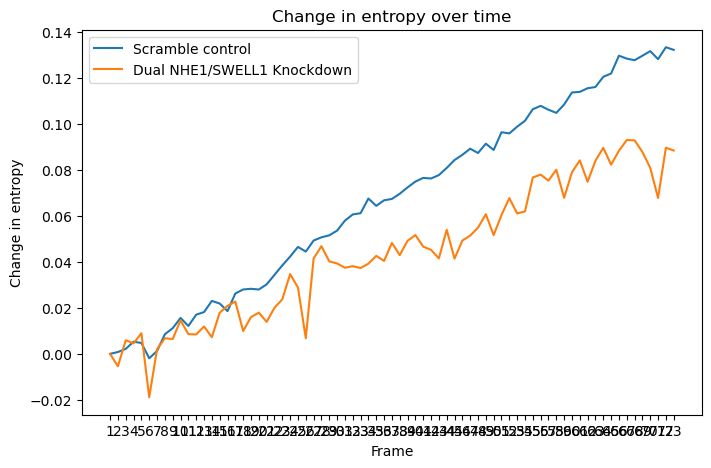

In [23]:
plt.figure(figsize=(8,5))
plt.plot(entropies_dataframe.Frame, entropies_dataframe.SC_ENTROPY_CHANGE, label="Scramble control")
plt.plot(entropies_dataframe.Frame, entropies_dataframe.DUAL_KD_ENTROPY_CHANGE, label="Dual NHE1/SWELL1 Knockdown")

plt.title("Change in entropy over time")
plt.ylabel("Change in entropy")
plt.xlabel("Frame")
plt.legend()
plt.xticks(entropies_dataframe.Frame)
plt.savefig("movie3_entropy_line_plot.png")
plt.show()

- SC cells migrate faster over time
- Dual NHE1/SWELL1 knockdown cells show minimal migration

## Regression Analysis of SC cells and Dual KD cells

In [27]:
sc_data_set = entropies_dataframe[["Frame", "SC_ENTROPY_CHANGE"]]

In [29]:
sc_data_set.corr()

,Frame,SC_ENTROPY_CHANGE
Frame,1.000000,0.997657
SC_ENTROPY_CHANGE,0.997657,1.000000


In [31]:
import statsmodels.api as sm
X_SC = sm.add_constant(sc_data_set[["Frame"]])
Y_SC = sc_data_set[["SC_ENTROPY_CHANGE"]]
SC_Reg_res = sm.OLS(Y_SC, X_SC).fit()
print(SC_Reg_res.summary())

                            OLS Regression Results                            
Dep. Variable:      SC_ENTROPY_CHANGE   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.510e+04
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           1.85e-84
Time:                        03:56:31   Log-Likelihood:                 324.02
No. Observations:                  73   AIC:                            -644.0
Df Residuals:                      71   BIC:                            -639.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0063      0.001     -9.181      0.0

### Regression model for Entropy change in Dual Knockdown cells

In [34]:
kd_data_set = entropies_dataframe[["Frame", "DUAL_KD_ENTROPY_CHANGE"]]

In [36]:
kd_data_set.corr()

,Frame,DUAL_KD_ENTROPY_CHANGE
Frame,1.000000,0.969179
DUAL_KD_ENTROPY_CHANGE,0.969179,1.000000


In [38]:
X_KD = sm.add_constant(kd_data_set[["Frame"]])
Y_KD = kd_data_set[["DUAL_KD_ENTROPY_CHANGE"]]
KD_Reg_res = sm.OLS(Y_KD, X_KD).fit()
print(KD_Reg_res.summary())

                              OLS Regression Results                              
Dep. Variable:     DUAL_KD_ENTROPY_CHANGE   R-squared:                       0.939
Model:                                OLS   Adj. R-squared:                  0.938
Method:                     Least Squares   F-statistic:                     1099.
Date:                    Fri, 22 Nov 2024   Prob (F-statistic):           6.16e-45
Time:                            03:56:42   Log-Likelihood:                 256.83
No. Observations:                      73   AIC:                            -509.7
Df Residuals:                          71   BIC:                            -505.1
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [40]:
SC_Reg_res.params

const   -0.006293
Frame    0.001978
dtype: float64

In [42]:
KD_Reg_res.params

const   -0.005727
Frame    0.001340
dtype: float64

In [44]:
SC_Reg_res.rsquared_adj

0.99525444371282

In [46]:
KD_Reg_res.rsquared_adj

0.9384523519851914

#### SC cells
- B0 = -0.006293
- B1 = 0.001978
#### Dual KD Cells
- B0 = -0.005727
- B1 = 0.001340

Slope in regression model of Dual KD cells is less than that of SC cells.
This implies less entropy change (cell migration) in Dual KD cells than in SC cells

## WALD TEST
- Compare the regression coefficients of SC cells with those of Dual KD cells 

In [50]:
SC_Reg_res.wald_test(f'(const = {KD_Reg_res.params.const})', scalar=True)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.6823719143216626, p=0.4115384187005978, df_denom=71, df_num=1>

In [52]:
SC_Reg_res.wald_test(f'(Frame = {KD_Reg_res.params.Frame})', scalar=True)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=1573.7371390298028, p=3.406760019297486e-50, df_denom=71, df_num=1>

The slope (B1) of SC cells is significantly greater than slope of Dual KD cells.
The intercepts are not statistically different because they both start at the same point